<a href="https://colab.research.google.com/github/SuWeizhe1124/AI-108-2/blob/master/5-16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **數字辨識**
4050D028 蘇偉哲   還在搞5-16
參考 : https://ithelp.ithome.com.tw/articles/10191404


In [66]:

from keras import layers
from keras import models
from keras.layers import LeakyReLU
 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3))) 
model.add(LeakyReLU(alpha=0.05))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.0474 - accuracy: 0.7957 - val_loss: 0.0292 - val_accuracy: 0.9082
Epoch 2/10
 - 1s - loss: 0.0262 - accuracy: 0.9141 - val_loss: 0.0222 - val_accuracy: 0.9287
Epoch 3/10
 - 1s - loss: 0.0211 - accuracy: 0.9285 - val_loss: 0.0190 - val_accuracy: 0.9351
Epoch 4/10
 - 1s - loss: 0.0184 - accuracy: 0.9361 - val_loss: 0.0171 - val_accuracy: 0.9427
Epoch 5/10
 - 1s - loss: 0.0166 - accuracy: 0.9427 - val_loss: 0.0157 - val_accuracy: 0.9480
Epoch 6/10
 - 1s - loss: 0.0152 - accuracy: 0.9471 - val_loss: 0.0147 - val_accuracy: 0.9503
Epoch 7/10
 - 1s - loss: 0.0142 - accuracy: 0.9514 - val_loss: 0.0138 - val_accuracy: 0.9532
Epoch 8/10
 - 1s - loss: 0.0133 - accuracy: 0.9547 - val_loss: 0.0131 - val_accuracy: 0.9550
Epoch 9/10
 - 1s - loss: 0.0125 - accuracy: 0.9573 - val_loss: 0.0125 - val_accuracy: 0.9571
Epoch 10/10
 - 1s - loss: 0.0119 - accuracy: 0.9597 - val_loss: 0.0120 - val_accuracy: 0.9573
10000/10000 [======

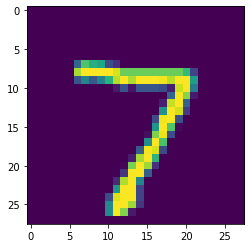

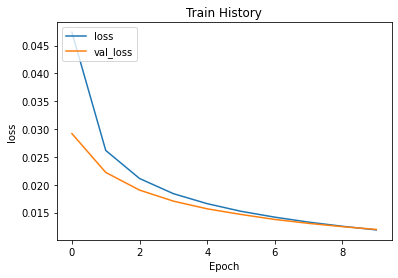

In [57]:
# 導入函式庫
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils 
from matplotlib import pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
model = Sequential()
##tanh
model.add(Dense(units=256, input_dim=784,activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(units=10, kernel_initializer='normal', activation='tanh'))

##   選擇損失函數 mean_squared_error 、優化方法 Adamax   及成效衡量方式
model.compile(loss='mean_squared_error', optimizer='Adamax', metrics=['accuracy']) 
y_TrainOneHot = np_utils.to_categorical(y_train)  ## 測試
y_TestOneHot = np_utils.to_categorical(y_test)    ## 預測
X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255
##   2D 
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=800, verbose=2)  
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  
X = x_Test_norm[0:10,:]
predictions = model.predict_classes(X)
print(predictions)
plt.imshow(X_test[0])
plt.show() 
##  ---------------------------------------------------##  
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

In [44]:
from __future__ import absolute_import, division, print_function, unicode_literals

# 安装 TensorFlow

import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)
plt.show() 

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1413 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1070 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0871 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0737 - accuracy: 0.9773
313/313 - 0s - loss: 0.0726 - accuracy: 0.9785
